In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Aim is to predict the marks of students of the test data

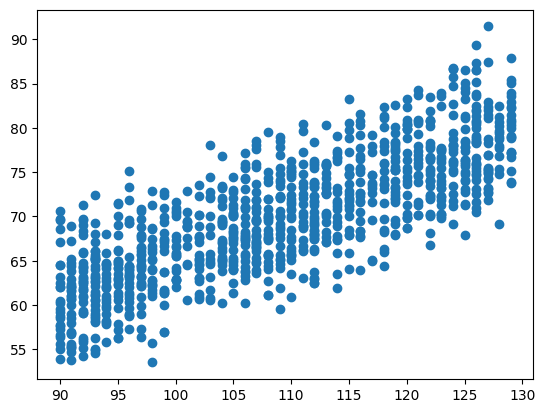

In [134]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
plt.scatter(x_train[:,7],y_train)
plt.show()
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  internet_df=pd.DataFrame(x_train[:,0])
  internet_df.replace(('yes', 'no'), (1, 0), inplace=True)
  sex_df=pd.DataFrame(x_train[:,1])
  sex_df.replace(('M', 'F'), (1, 0), inplace=True)
  x_train=np.array(x_train)
  x_train[:, 0].flatten()
  x_train[:, 1].flatten()
  return x_train

x_train = feature_changing(x_train)


In [110]:
def z_score(x_train):
  for column in range(x_train.shape[1]):
    x_mean = np.mean(x_train[:,column])
    x_std = np.std(x_train[:,column])
    x_train[:,column]=(x_train[:,column]- x_mean) /x_std
    return x_train, x_mean, x_std



In [131]:
def cost(x_train,y_train,w,b):
  line_pred=np.dot(x_train,w)+b
  L=len(x_train)
  err=(line_pred-y_train)
  err_std = np.std(err)  # Calculate standard deviation
  scaled_err = err / (err_std + 1e-8)
  loss=(1/(2*L))*np.sum(scaled_err**2)
  # ---------
    # Your code here
    # Use mean square error as cost function
    # return cost
  # ---------

  return loss

In [132]:
def gradient_descent(x_train,y_train,w,b):
  line_pred = np.dot(x_train, w) + b
  L=len(x_train)

  learning_rate=0.01
  iterations=1000
  for i in range(iterations):
    dw=(2/L)*np.sum(x_train*(line_pred-y_train))
    db=(2/L)*np.sum(line_pred-y_train)
    w=w-learning_rate*dw
    b=b-learning_rate*db
    return w,b

In [135]:
x_train=x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Optimization required, your accuracy is 0.0%
